In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv


# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)





Python version 2.7.16 |Anaconda, Inc.| (default, Sep 24 2019, 21:51:30) 
[GCC 7.3.0]
Pandas version 0.24.2
Matplotlib version 2.2.3


In [3]:
#read the file
train = pd.read_csv("train.csv")


In [30]:
#create list and array with neirghbourhood
allo=list(zip(train.neighbourhoodF))
df1 = pd.DataFrame(data = allo, columns=[ 'neighbourhoodF'])
allo=list(zip(train.neighbourhoodM))
df2 = pd.DataFrame(data = allo, columns=[ 'neighbourhoodF'])
allo=list(zip(train.neighbourhoodA))
df3 = pd.DataFrame(data = allo, columns=[ 'neighbourhoodF'] )

#create column with every line have 1
df1['One']=1
df2['One']=1
df3['One']=1

#create list and array with every neighbourhood of month and One
allo=list(zip(train.neighbourhoodF,df1.One))
df1 = pd.DataFrame(data = allo, columns=[ 'neighbourhood','One'])

allo=list(zip(train.neighbourhoodM,df2.One))
df2 = pd.DataFrame(data = allo, columns=[ 'neighbourhood','One'])

allo=list(zip(train.neighbourhoodA,df3.One))
df3 = pd.DataFrame(data = allo, columns=[ 'neighbourhood','One'])

#find the number of apartement for every month
d_1 = pd.DataFrame(data = df1.groupby(['neighbourhood']).sum())
d_2 = pd.DataFrame(data = df2.groupby(['neighbourhood']).sum())
d_3 = pd.DataFrame(data = df3.groupby(['neighbourhood']).sum())

#kartesiano
df_row = pd.concat([d_1,d_2,d_3])

#the count of all apartment 
num_apartment = pd.DataFrame(data = df_row.groupby(['neighbourhood']).sum())

#create list and array with the number of apartement and the days sum of availability
temp_list=list(zip(num_apartment.One,num_apartment.One))
all_ = pd.DataFrame(data = temp_list, columns=[ 'num_apartment_One','avail_num_apartment_One'])

#polaplasiase me 365 gia na exeis tin sunoliki diathesimotita
all_['avail_num_apartment_One'] = all_['avail_num_apartment_One'] * 365 



In [49]:
#find availability for every month 
game=list(zip(train.neighbourhoodF,train.availability_365F))
df1 = pd.DataFrame(data = game, columns=[ 'neighbourhood','availability' ])

game=list(zip(train.neighbourhoodM,train.availability_365M))
df2 = pd.DataFrame(data = game, columns=[ 'neighbourhood','availability'])

game=list(zip(train.neighbourhoodA,train.availability_365A))
df3 = pd.DataFrame(data = game, columns=[ 'neighbourhood','availability'])

#kartesiano
df_row = pd.concat([df1,df2,df3])


In [57]:
#find the availability for all month
ddf = pd.DataFrame(data = df_row.groupby(['neighbourhood']).sum())
#do array again
d_1=ddf.reset_index()


In [58]:
#create list nad array with availability which have apartment for every neighbourhood in a year and 
# the availability of apartemnt now 
list_avai=list(zip(all_.avail_num_apartment_One  , d_1.availability))
df3 = pd.DataFrame(data = list_avai, columns=[ 'avail_num_apartment_One','sum_availability'])


In [59]:
#find the reservation
df3['result']=(df3['avail_num_apartment_One']-df3['sum_availability'])

In [106]:

#create array with neighbourhood and reservation an retain the fisrt and the rest 
list_final=list(zip(d_1.neighbourhood,df3.result))
final= pd.DataFrame(data = list_final, columns=[ 'neighbourhood','result'])

final=pd.DataFrame(data = final.groupby(['neighbourhood']).sum())

final_one=final.sort_values(by='result', ascending=False)
final_one = final.head(1)
final_one = pd.DataFrame(data = final_one.groupby(['neighbourhood']).sum())


The most popular name


,result
neighbourhood,
Agios Loukas,34630


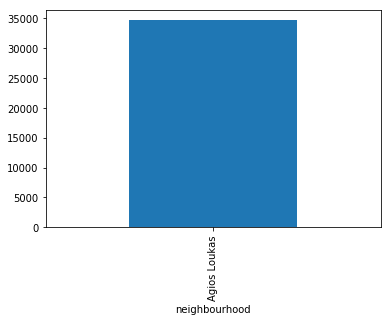

In [107]:
final_one['result'].plot.bar()

print("The most popular name")
final_one.sort_values(by='result', ascending=False)

In [110]:
#ERWTIMA 1.5-1.6


The most popular name


,result
neighbourhood,
Plaka,373651
Koukaki,284692
Neos Kosmos,282329
Pangrati,216551
Ambelokipi,206330
Kolonaki,196606
Larissis,182733
Metaxourgeio,179624
Exarcheia,169907


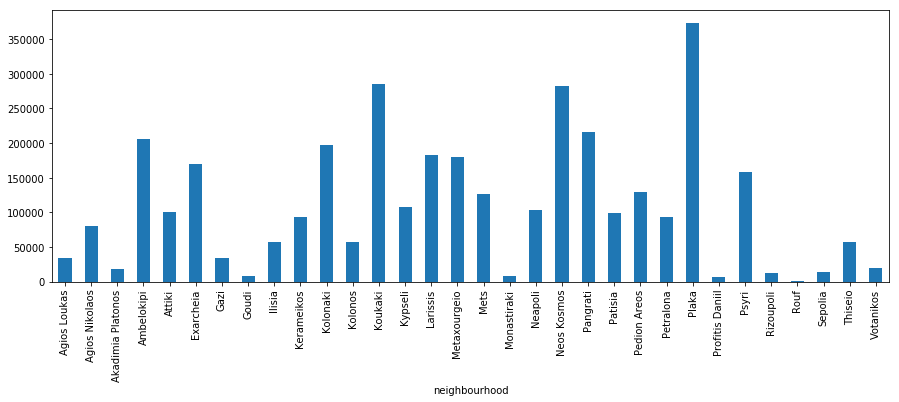

In [111]:
#diagrma for the reservesion per neighbourhood

final['result'].plot.bar(figsize=(15, 5))

print("The most popular name")
final.sort_values(by='result', ascending=False)

In [109]:
#ERWIMA 1.5 #reservasion per month 

In [112]:
#read the file 
train = pd.read_csv("train.csv")


#read the availability from listing for three month
af= pd.read_csv("data/febrouary/listings.csv")
availF=af.availability_30
am=pd.read_csv("data/march/listings.csv")
availM=am.availability_30
aa=pd.read_csv("data/april/listings.csv")
availA=aa.availability_30

month=list(zip(availF,availM,availA))
df = pd.DataFrame(data = month, columns=[ 'Av_F','Av_M','Av_A'])

#find the sum availability per month for month 
sumf=sum(df.Av_F)
summ=sum(df.Av_M)
suma=sum(df.Av_A)

#find the reservation per month for month 

sumF=len(availF)*30 -sumf
sumM=len(availM)*30 -summ
sumA=len(availA)*30 -suma



/home/alex/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
#create list and array with results from reservation
allo=list(zip([sumF],[sumM],[sumA]))
df = pd.DataFrame(data = allo, columns=['reservation_FEBRUARY','reservation_MARCH','reservation_APRIL'])

In [114]:
#do the column to line 
transpose = df.T

The reservations per month (every day is one reservation)


,0
reservation_APRIL,174855
reservation_MARCH,133250
reservation_FEBRUARY,121199


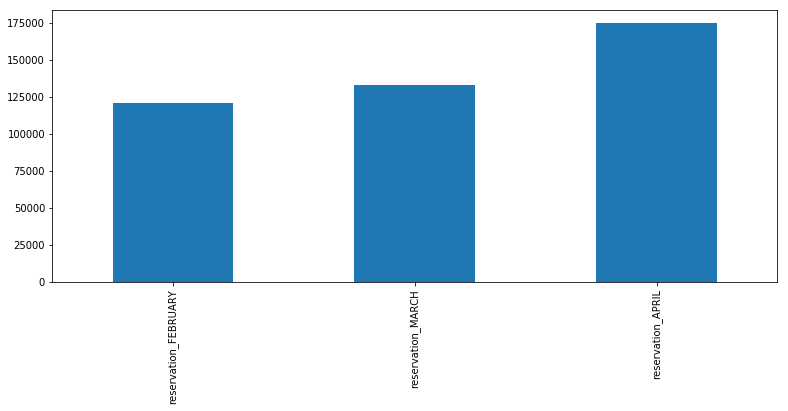

In [116]:
#diagram for reservation per month
transpose[0].plot.bar(figsize=(13, 5))

print("The reservations per month (every day is one reservation)")
transpose.sort_values(by=0, ascending=False)